In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import hashlib
import statsmodels.api as sm
import seaborn as sns

In [ ]:
games = pd.read_csv('/work/20231129-000846/games.csv')
games_details = pd.read_csv('/work/20231129-000846/games_details.csv')
# players = pd.read_csv('/work/20231129-000846/players.csv')
ranking = pd.read_csv('/work/20231129-000846/ranking.csv')
teams = pd.read_csv('/work/20231129-000846/teams.csv')

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
games_details[games_details['COMMENT'].isnull() == False]['COMMENT'].value_counts()

DNP - Coach's Decision                      58054
DNP - Coach's Decision                      30547
DND - Injury/Illness                         1267
DNP - Injury/Illness                         1161
DNP - Injury/Illness                         1151
                                            ...  
NWT - INJ - Sprained Right Knee                 1
DND - retinal surgery left eye                  1
DND - Sore Right Glute                          1
NWT-ruptured right achilles                     1
DND - Sprained Left Hand                        1
Name: COMMENT, Length: 5348, dtype: int64

In [ ]:
home_games = games.groupby(['SEASON', 'HOME_TEAM_ID']).agg('mean').reset_index().loc[:, ['SEASON', 'HOME_TEAM_ID', 'PTS_home', 'FG_PCT_home', 'AST_home', 'REB_home', 'FT_PCT_home', 'FG3_PCT_home']]
away_games = games.groupby(['SEASON', 'VISITOR_TEAM_ID']).agg('mean').reset_index().loc[:, ['SEASON', 'VISITOR_TEAM_ID', 'PTS_away', 'FG_PCT_away', 'AST_away', 'REB_away', 'FT_PCT_away', 'FG3_PCT_away']]
away_games

,SEASON,VISITOR_TEAM_ID,PTS_away,FG_PCT_away,AST_away,REB_away,FT_PCT_away,FG3_PCT_away
0,2003,1610612737,89.463415,0.426854,19.902439,41.073171,0.765195,0.305268
1,2003,1610612738,94.255814,0.442209,20.162791,38.372093,0.749093,0.328977
2,2003,1610612739,90.348837,0.435279,20.720930,45.139535,0.724558,0.323837
3,2003,1610612740,88.688889,0.406044,18.666667,43.044444,0.763156,0.294578
4,2003,1610612741,89.714286,0.427190,20.714286,41.095238,0.726548,0.354595
...,...,...,...,...,...,...,...,...
594,2022,1610612762,111.600000,0.451800,25.150000,43.150000,0.762000,0.351150
595,2022,1610612763,111.666667,0.453500,22.888889,46.833333,0.709111,0.336833
596,2022,1610612764,108.666667,0.470905,24.190476,42.476190,0.728429,0.306524
597,2022,1610612765,108.450000,0.436800,21.000000,43.500000,0.794600,0.332100


In [ ]:
grouped_rankings = ranking.groupby(['TEAM_ID', 'STANDINGSDATE']).agg('mean').reset_index()
grouped_ranking = grouped_rankings[grouped_rankings.G == 82].groupby(['SEASON_ID', 'TEAM_ID']).agg('mean').reset_index()
#grouped_ranking['SEASON_ID'] = str(grouped_ranking['SEASON_ID'])
season_id = grouped_ranking['SEASON_ID']
seasons = []
for season in season_id:
    seasons.append(int(str(season)[1:]))
grouped_ranking['SEASON_ID'] = seasons
grouped_ranking

,SEASON_ID,TEAM_ID,LEAGUE_ID,G,W,L,W_PCT,RETURNTOPLAY
0,2002,1610612737,0,82,35,47,0.427,NaN
1,2002,1610612738,0,82,44,38,0.537,NaN
2,2002,1610612739,0,82,17,65,0.207,NaN
3,2002,1610612740,0,82,47,35,0.573,NaN
4,2002,1610612741,0,82,30,52,0.366,NaN
...,...,...,...,...,...,...,...,...
501,2021,1610612762,0,82,49,33,0.598,NaN
502,2021,1610612763,0,82,56,26,0.683,NaN
503,2021,1610612764,0,82,35,47,0.427,NaN
504,2021,1610612765,0,82,23,59,0.280,NaN


In [ ]:
merged_stats_home = pd.merge(grouped_ranking, home_games,  how='left', left_on=['SEASON_ID','TEAM_ID'], right_on = ['SEASON', 'HOME_TEAM_ID'])
merged_stats_away = pd.merge(grouped_ranking, away_games,  how='left', left_on=['SEASON_ID','TEAM_ID'], right_on = ['SEASON', 'VISITOR_TEAM_ID'])
merged_stats_home

,SEASON_ID,TEAM_ID,LEAGUE_ID,G,W,L,W_PCT,RETURNTOPLAY,SEASON,HOME_TEAM_ID,PTS_home,FG_PCT_home,AST_home,REB_home,FT_PCT_home,FG3_PCT_home
0,2002,1610612737,0,82,35,47,0.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,1610612738,0,82,44,38,0.537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,1610612739,0,82,17,65,0.207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,1610612740,0,82,47,35,0.573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,1610612741,0,82,30,52,0.366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2021,1610612762,0,82,49,33,0.598,NaN,2021.0,1.610613e+09,116.369565,0.480891,23.326087,46.826087,0.767304,0.361739
502,2021,1610612763,0,82,56,26,0.683,NaN,2021.0,1.610613e+09,116.400000,0.466880,26.560000,48.940000,0.749700,0.358300
503,2021,1610612764,0,82,35,47,0.427,NaN,2021.0,1.610613e+09,111.511628,0.475651,25.558140,43.720930,0.781302,0.338558
504,2021,1610612765,0,82,23,59,0.280,NaN,2021.0,1.610613e+09,105.465116,0.436651,23.488372,43.627907,0.796721,0.321628


In [ ]:
merged_stats_away

,SEASON_ID,TEAM_ID,LEAGUE_ID,G,W,L,W_PCT,RETURNTOPLAY,SEASON,VISITOR_TEAM_ID,PTS_away,FG_PCT_away,AST_away,REB_away,FT_PCT_away,FG3_PCT_away
0,2002,1610612737,0,82,35,47,0.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,1610612738,0,82,44,38,0.537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,1610612739,0,82,17,65,0.207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,1610612740,0,82,47,35,0.573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,1610612741,0,82,30,52,0.366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2021,1610612762,0,82,49,33,0.598,NaN,2021.0,1.610613e+09,108.565217,0.455478,20.869565,45.608696,0.773130,0.345370
502,2021,1610612763,0,82,56,26,0.683,NaN,2021.0,1.610613e+09,113.020000,0.449400,24.940000,48.880000,0.737820,0.346420
503,2021,1610612764,0,82,35,47,0.427,NaN,2021.0,1.610613e+09,105.837209,0.465419,24.209302,42.837209,0.775326,0.344860
504,2021,1610612765,0,82,23,59,0.280,NaN,2021.0,1.610613e+09,104.186047,0.428372,23.348837,42.372093,0.767581,0.330977


In [ ]:
team_grouped_game_details = games_details.groupby('TEAM_ABBREVIATION').agg('mean')
team_grouped_game_details

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
TEAM_ABBREVIATION,,,,,,,,,,,,,,,,,,,,,
ATL,2.187352e+07,1.610613e+09,392557.413695,3.515850,7.769336,0.410387,0.774989,2.191568,0.206417,1.683907,...,0.987056,2.954987,3.942044,2.117868,0.718724,0.445795,1.335270,1.947221,9.490596,-0.679476
BKN,2.206455e+07,1.610613e+09,573650.227262,3.571260,7.820301,0.424224,0.957510,2.685551,0.221114,1.648962,...,0.925248,3.076030,4.001279,2.108882,0.665093,0.427166,1.315924,1.880889,9.748992,-0.676632
BOS,2.279800e+07,1.610613e+09,437813.675926,3.491265,7.623064,0.416811,0.790200,2.210195,0.201279,1.696511,...,0.922445,2.987577,3.910022,2.122296,0.739668,0.443702,1.317100,2.036971,9.469240,1.123914
CHA,2.062666e+07,1.610613e+09,527162.054650,3.482143,7.907333,0.410120,0.740093,2.122271,0.187775,1.746381,...,1.005280,2.998636,4.003916,2.088692,0.703310,0.474727,1.269400,1.914333,9.450759,-1.473757
CHI,2.154612e+07,1.610613e+09,433501.287787,3.604232,8.081023,0.411243,0.720956,2.015308,0.191892,1.693237,...,1.090482,3.154721,4.245203,2.162047,0.702914,0.481275,1.361653,2.008802,9.622656,-0.181225
CLE,2.223840e+07,1.610613e+09,335162.843711,3.538782,7.845085,0.406854,0.788110,2.205624,0.197701,1.723237,...,1.064557,3.032963,4.097520,2.053025,0.679374,0.420831,1.300879,1.927597,9.588911,-0.092678
DAL,2.199438e+07,1.610613e+09,383692.376380,3.503987,7.675453,0.419815,0.825182,2.312002,0.210098,1.682208,...,0.955305,2.971710,3.927015,2.015745,0.675504,0.431815,1.171568,1.896897,9.515364,0.968928
DEN,2.175286e+07,1.610613e+09,384646.233989,3.758572,8.107552,0.427802,0.778113,2.197933,0.204805,1.898207,...,1.093610,3.102923,4.196533,2.290144,0.777090,0.486300,1.380740,2.062120,10.193465,0.755612
DET,2.160970e+07,1.610613e+09,439367.233639,3.519233,7.907435,0.409747,0.703610,2.024766,0.194679,1.664983,...,1.116579,2.949984,4.066563,2.060492,0.698238,0.462340,1.250510,1.958848,9.407059,-0.218854


In [ ]:
id_to_teamname = team_grouped_game_details[['TEAM_ID']].reset_index()
id_to_teamname

,TEAM_ABBREVIATION,TEAM_ID
0,ATL,1.610613e+09
1,BKN,1.610613e+09
2,BOS,1.610613e+09
3,CHA,1.610613e+09
4,CHI,1.610613e+09
5,CLE,1.610613e+09
6,DAL,1.610613e+09
7,DEN,1.610613e+09
8,DET,1.610613e+09
9,GSW,1.610613e+09


In [ ]:
home_team_abbrev = []
for team in merged_stats_home['TEAM_ID']:
    abbrev = id_to_teamname[id_to_teamname['TEAM_ID'] == team]['TEAM_ABBREVIATION'].values[0]
    home_team_abbrev.append(abbrev)
merged_stats_home['TEAM_ID'] = home_team_abbrev
merged_stats_home

,SEASON_ID,TEAM_ID,LEAGUE_ID,G,W,L,W_PCT,RETURNTOPLAY,SEASON,HOME_TEAM_ID,PTS_home,FG_PCT_home,AST_home,REB_home,FT_PCT_home,FG3_PCT_home
0,2002,ATL,0,82,35,47,0.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,BOS,0,82,44,38,0.537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,CLE,0,82,17,65,0.207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,NOH,0,82,47,35,0.573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,CHI,0,82,30,52,0.366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2021,UTA,0,82,49,33,0.598,NaN,2021.0,1.610613e+09,116.369565,0.480891,23.326087,46.826087,0.767304,0.361739
502,2021,MEM,0,82,56,26,0.683,NaN,2021.0,1.610613e+09,116.400000,0.466880,26.560000,48.940000,0.749700,0.358300
503,2021,WAS,0,82,35,47,0.427,NaN,2021.0,1.610613e+09,111.511628,0.475651,25.558140,43.720930,0.781302,0.338558
504,2021,DET,0,82,23,59,0.280,NaN,2021.0,1.610613e+09,105.465116,0.436651,23.488372,43.627907,0.796721,0.321628


In [ ]:
away_team_abbrev = []
for team in merged_stats_away['TEAM_ID']:
    abbrev = id_to_teamname[id_to_teamname['TEAM_ID'] == team]['TEAM_ABBREVIATION'].values[0]
    away_team_abbrev.append(abbrev)
merged_stats_away['TEAM_ID'] = away_team_abbrev
merged_stats_away

,SEASON_ID,TEAM_ID,LEAGUE_ID,G,W,L,W_PCT,RETURNTOPLAY,SEASON,VISITOR_TEAM_ID,PTS_away,FG_PCT_away,AST_away,REB_away,FT_PCT_away,FG3_PCT_away
0,2002,ATL,0,82,35,47,0.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,BOS,0,82,44,38,0.537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,CLE,0,82,17,65,0.207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,NOH,0,82,47,35,0.573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,CHI,0,82,30,52,0.366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2021,UTA,0,82,49,33,0.598,NaN,2021.0,1.610613e+09,108.565217,0.455478,20.869565,45.608696,0.773130,0.345370
502,2021,MEM,0,82,56,26,0.683,NaN,2021.0,1.610613e+09,113.020000,0.449400,24.940000,48.880000,0.737820,0.346420
503,2021,WAS,0,82,35,47,0.427,NaN,2021.0,1.610613e+09,105.837209,0.465419,24.209302,42.837209,0.775326,0.344860
504,2021,DET,0,82,23,59,0.280,NaN,2021.0,1.610613e+09,104.186047,0.428372,23.348837,42.372093,0.767581,0.330977


In [ ]:
team_grouped_rankings = ranking.groupby('TEAM_ID').agg('mean')
team_grouped_rankings

,LEAGUE_ID,SEASON_ID,G,W,L,W_PCT,RETURNTOPLAY
TEAM_ID,,,,,,,
1610612737,0.0,21401.239784,56.595899,26.274954,30.320945,0.461757,0.0
1610612738,0.0,21401.415943,56.640854,32.230747,24.410107,0.564731,1.0
1610612739,0.0,21401.239784,56.543358,28.206180,28.337178,0.489460,0.0
1610612740,0.0,21401.239784,56.651573,25.925388,30.726185,0.453922,NaN
1610612741,0.0,21401.327876,56.472096,28.143508,28.328588,0.486476,0.0
1610612742,0.0,21401.503985,56.841731,33.425989,23.415742,0.568303,NaN
1610612743,0.0,21401.327876,56.726082,32.041002,24.685080,0.555461,NaN
1610612744,0.0,21401.415943,56.597865,30.990605,25.607260,0.539848,NaN
1610612745,0.0,21401.415943,56.747189,32.074733,24.672456,0.553338,NaN


In [ ]:
def create_W_PCT_model_OLS(year, home_or_away):
    if home_or_away == 'home':
        data = merged_stats_home[merged_stats_home.SEASON == year]
    else: data = merged_stats_away[merged_stats_away.SEASON == year]
    Y = data['W_PCT']
    X = data[['PTS_' + home_or_away, 'FG_PCT_' +  home_or_away, 'AST_' + home_or_away, 'REB_' + home_or_away, 'FT_PCT_' + home_or_away, 'FG3_PCT_' +  home_or_away]]
    OLS_model = sm.OLS(Y, X).fit()
    print(OLS_model.summary())

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def create_W_PCT_model_RF(year, home_or_away):
    if home_or_away == 'home':
        data = merged_stats_home[merged_stats_home.SEASON == year]
    else: data = merged_stats_away[merged_stats_away.SEASON == year]
    train, test = train_test_split(data, test_size = 0.3, random_state = 1)

    X_cols = ['PTS_' + home_or_away, 'FG_PCT_' +  home_or_away, 'AST_' + home_or_away, 'REB_' + home_or_away, 'FT_PCT_' + home_or_away, 'FG3_PCT_' +  home_or_away] # Columns used for prediction
    y_col = 'W_PCT'

    X = train.loc[:, X_cols]
    Y = train.loc[:, y_col]

    forest_model = RandomForestRegressor(max_features=2)
    forest_model.fit(X, Y)

    train["forest_pred"] = forest_model.predict(train.loc[:, X_cols])
    test["forest_pred"] = forest_model.predict(test.loc[:, X_cols])

    train_rmse = np.mean((train["forest_pred"] - train["W_PCT"]) ** 2) ** 0.5
    test_rmse = np.mean((test["forest_pred"] - test["W_PCT"]) ** 2) ** 0.5

    if home_or_away == 'home':
        train = train.drop(['RETURNTOPLAY', 'LEAGUE_ID', 'SEASON', home_or_away.upper() + '_TEAM_ID'], axis = 1)
    else: 
        train = train.drop(['RETURNTOPLAY', 'LEAGUE_ID', 'SEASON', 'VISITOR_TEAM_ID'], axis = 1)
    train = train.reset_index(drop=True)
    display(train)

    print("The training RMSE is: " + str(train_rmse) + " and the test RMSE is: " + str(test_rmse) + ' for year ' + str(year) + ' and all ' + home_or_away + ' teams.')
    return train

### 2003

This was the first year we consider in our dataset. We start with the parametric methods

OLS Home

In [ ]:
create_W_PCT_model_OLS(2003, 'home')

                                 OLS Regression Results                                
Dep. Variable:                  W_PCT   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              110.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                    9.03e-16
Time:                        05:01:38   Log-Likelihood:                          27.145
No. Observations:                  29   AIC:                                     -42.29
Df Residuals:                      23   BIC:                                     -34.09
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

OLS Away

In [ ]:
create_W_PCT_model_OLS(2003, 'away')

                                 OLS Regression Results                                
Dep. Variable:                  W_PCT   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              64.45
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                    3.14e-13
Time:                        05:01:38   Log-Likelihood:                          19.712
No. Observations:                  29   AIC:                                     -27.42
Df Residuals:                      23   BIC:                                     -19.22
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Random Forest Home

In [ ]:
home_2003 = create_W_PCT_model_RF(2003, 'home')
home_2003

,SEASON_ID,TEAM_ID,G,W,L,W_PCT,PTS_home,FG_PCT_home,AST_home,REB_home,FT_PCT_home,FG3_PCT_home,forest_pred
0,2003,SAS,82,57,25,0.695,93.608696,0.456761,20.673913,44.804348,0.672130,0.356935,0.63654
1,2003,CHI,82,23,59,0.280,88.902439,0.405610,22.756098,45.658537,0.718268,0.346268,0.41646
2,2003,CLE,82,35,47,0.427,95.536585,0.435439,23.487805,46.170732,0.768195,0.317976,0.46972
3,2003,TOR,82,33,49,0.402,87.095238,0.425881,19.690476,40.000000,0.741976,0.327024,0.43348
4,2003,DEN,82,43,39,0.524,100.232558,0.451186,25.372093,44.302326,0.754279,0.340093,0.52815
5,2003,IND,82,61,21,0.744,90.020000,0.423200,22.460000,42.920000,0.755320,0.330160,0.62219
6,2003,MIN,82,58,24,0.707,95.254902,0.467157,24.588235,43.803922,0.780922,0.345745,0.63708
7,2003,GSW,82,37,45,0.451,96.804878,0.450683,21.097561,46.268293,0.726902,0.326244,0.48046
8,2003,MEM,82,50,32,0.610,98.250000,0.452727,24.068182,43.704545,0.720864,0.345273,0.57165
9,2003,BOS,82,36,46,0.439,95.113636,0.443000,20.613636,41.840909,0.764068,0.343091,0.44155


The training RMSE is: 0.054957088942191895 and the test RMSE is: 0.0693367513580573 for year 2003 and all home teams.


,SEASON_ID,TEAM_ID,G,W,L,W_PCT,PTS_home,FG_PCT_home,AST_home,REB_home,FT_PCT_home,FG3_PCT_home,forest_pred
0,2003,SAS,82,57,25,0.695,93.608696,0.456761,20.673913,44.804348,0.672130,0.356935,0.63654
1,2003,CHI,82,23,59,0.280,88.902439,0.405610,22.756098,45.658537,0.718268,0.346268,0.41646
2,2003,CLE,82,35,47,0.427,95.536585,0.435439,23.487805,46.170732,0.768195,0.317976,0.46972
3,2003,TOR,82,33,49,0.402,87.095238,0.425881,19.690476,40.000000,0.741976,0.327024,0.43348
4,2003,DEN,82,43,39,0.524,100.232558,0.451186,25.372093,44.302326,0.754279,0.340093,0.52815
5,2003,IND,82,61,21,0.744,90.020000,0.423200,22.460000,42.920000,0.755320,0.330160,0.62219
6,2003,MIN,82,58,24,0.707,95.254902,0.467157,24.588235,43.803922,0.780922,0.345745,0.63708
7,2003,GSW,82,37,45,0.451,96.804878,0.450683,21.097561,46.268293,0.726902,0.326244,0.48046
8,2003,MEM,82,50,32,0.610,98.250000,0.452727,24.068182,43.704545,0.720864,0.345273,0.57165
9,2003,BOS,82,36,46,0.439,95.113636,0.443000,20.613636,41.840909,0.764068,0.343091,0.44155


Random Forest Away

In [ ]:
away_2003 = create_W_PCT_model_RF(2003, 'away')
away_2003

,SEASON_ID,TEAM_ID,G,W,L,W_PCT,PTS_away,FG_PCT_away,AST_away,REB_away,FT_PCT_away,FG3_PCT_away,forest_pred
0,2003,SAS,82,57,25,0.695,88.869565,0.428391,19.978261,44.782609,0.681565,0.339696,0.59607
1,2003,CHI,82,23,59,0.280,89.714286,0.427190,20.714286,41.095238,0.726548,0.354595,0.32282
2,2003,CLE,82,35,47,0.427,90.348837,0.435279,20.720930,45.139535,0.724558,0.323837,0.48644
3,2003,TOR,82,33,49,0.402,83.512195,0.408171,18.634146,39.219512,0.752390,0.366780,0.43734
4,2003,DEN,82,43,39,0.524,93.522727,0.435682,18.295455,40.477273,0.766886,0.322000,0.51353
5,2003,IND,82,61,21,0.744,90.244898,0.438612,19.346939,40.306122,0.750735,0.330816,0.64505
6,2003,MIN,82,58,24,0.707,92.857143,0.449327,20.061224,41.673469,0.789082,0.355714,0.65114
7,2003,GSW,82,37,45,0.451,89.756098,0.434415,19.902439,39.951220,0.719000,0.332512,0.44461
8,2003,MEM,82,50,32,0.610,94.093023,0.438209,21.837209,39.325581,0.731395,0.327000,0.57346
9,2003,BOS,82,36,46,0.439,94.255814,0.442209,20.162791,38.372093,0.749093,0.328977,0.51037


The training RMSE is: 0.058112963872099854 and the test RMSE is: 0.09702967152142514 for year 2003 and all away teams.


,SEASON_ID,TEAM_ID,G,W,L,W_PCT,PTS_away,FG_PCT_away,AST_away,REB_away,FT_PCT_away,FG3_PCT_away,forest_pred
0,2003,SAS,82,57,25,0.695,88.869565,0.428391,19.978261,44.782609,0.681565,0.339696,0.59607
1,2003,CHI,82,23,59,0.280,89.714286,0.427190,20.714286,41.095238,0.726548,0.354595,0.32282
2,2003,CLE,82,35,47,0.427,90.348837,0.435279,20.720930,45.139535,0.724558,0.323837,0.48644
3,2003,TOR,82,33,49,0.402,83.512195,0.408171,18.634146,39.219512,0.752390,0.366780,0.43734
4,2003,DEN,82,43,39,0.524,93.522727,0.435682,18.295455,40.477273,0.766886,0.322000,0.51353
5,2003,IND,82,61,21,0.744,90.244898,0.438612,19.346939,40.306122,0.750735,0.330816,0.64505
6,2003,MIN,82,58,24,0.707,92.857143,0.449327,20.061224,41.673469,0.789082,0.355714,0.65114
7,2003,GSW,82,37,45,0.451,89.756098,0.434415,19.902439,39.951220,0.719000,0.332512,0.44461
8,2003,MEM,82,50,32,0.610,94.093023,0.438209,21.837209,39.325581,0.731395,0.327000,0.57346
9,2003,BOS,82,36,46,0.439,94.255814,0.442209,20.162791,38.372093,0.749093,0.328977,0.51037


Text(0.5, 1.0, '2003 Home Games Win%')

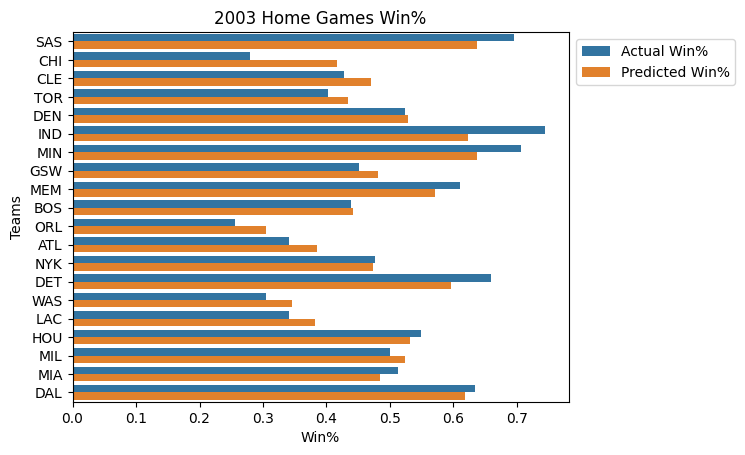

In [ ]:
home_graph_2003 = pd.DataFrame(data={'type': (['W_PCT'] * 20) + (['forest_pred'] * 20), 'vals' : list(home_2003['W_PCT']) + list(home_2003['forest_pred']), 'teams': list(home_2003['TEAM_ID']) + list(home_2003['TEAM_ID'])})
plot = sns.barplot(home_graph_2003, x='vals', y='teams', orient='h', hue = 'type')

handles, labels = plot.get_legend_handles_labels()
plt.legend(handles, ['Actual Win%', 'Predicted Win%'], bbox_to_anchor=(1.35, 1), loc='upper right')
plt.xlabel('Win%')
plt.ylabel('Teams')
plt.title('2003 Home Games Win%')

Text(0.5, 1.0, '2003 Away Games Win%')

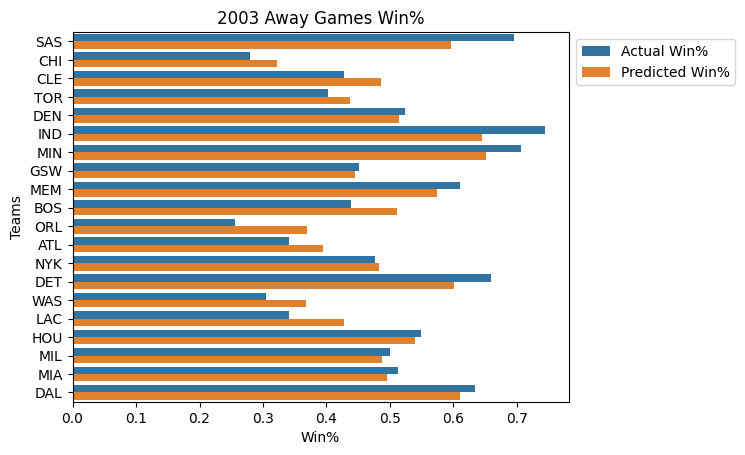

In [ ]:
away_graph_2003 = pd.DataFrame(data={'type': (['W_PCT'] * 20) + (['forest_pred'] * 20), 'vals' : list(away_2003['W_PCT']) + list(away_2003['forest_pred']), 'teams': list(away_2003['TEAM_ID']) + list(away_2003['TEAM_ID'])})
plot = sns.barplot(away_graph_2003, x='vals', y='teams', orient='h', hue = 'type')

handles, labels = plot.get_legend_handles_labels()
plt.legend(handles, ['Actual Win%', 'Predicted Win%'], bbox_to_anchor=(1.35, 1), loc='upper right')
plt.xlabel('Win%')
plt.ylabel('Teams')
plt.title('2003 Away Games Win%')

### 2021

In [ ]:
create_W_PCT_model_OLS(2021, 'home')

                                 OLS Regression Results                                
Dep. Variable:                  W_PCT   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              75.64
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                    2.13e-14
Time:                        05:48:05   Log-Likelihood:                          21.986
No. Observations:                  30   AIC:                                     -31.97
Df Residuals:                      24   BIC:                                     -23.57
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
create_W_PCT_model_OLS(2021, 'away')

                                 OLS Regression Results                                
Dep. Variable:                  W_PCT   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              67.81
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                    7.30e-14
Time:                        05:48:06   Log-Likelihood:                          20.435
No. Observations:                  30   AIC:                                     -28.87
Df Residuals:                      24   BIC:                                     -20.46
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
home_2021 = create_W_PCT_model_RF(2021, 'home')
home_2021

,SEASON_ID,TEAM_ID,G,W,L,W_PCT,PTS_home,FG_PCT_home,AST_home,REB_home,FT_PCT_home,FG3_PCT_home,forest_pred
0,2021,SAS,82,34,48,0.415,113.636364,0.472136,27.613636,45.500000,0.734045,0.357386,0.45802
1,2021,OKC,82,24,58,0.293,104.613636,0.438432,22.659091,45.931818,0.757591,0.330386,0.33142
2,2021,CHI,82,46,36,0.561,113.652174,0.480739,24.760870,44.239130,0.806065,0.369957,0.57094
3,2021,CLE,82,44,38,0.537,107.568182,0.467159,25.386364,44.181818,0.745727,0.357955,0.52381
4,2021,UTA,82,49,33,0.598,116.369565,0.480891,23.326087,46.826087,0.767304,0.361739,0.60191
5,2021,DEN,82,48,34,0.585,114.931818,0.483932,28.204545,43.931818,0.798091,0.356568,0.57366
6,2021,PHI,82,51,31,0.622,110.081633,0.470490,24.469388,41.448980,0.822878,0.366224,0.58122
7,2021,MIN,82,46,36,0.561,112.978261,0.447043,25.217391,45.478261,0.762457,0.354761,0.52562
8,2021,GSW,82,53,29,0.646,113.785714,0.477804,28.196429,46.410714,0.775518,0.376304,0.61778
9,2021,WAS,82,35,47,0.427,111.511628,0.475651,25.558140,43.720930,0.781302,0.338558,0.48411


The training RMSE is: 0.04345684367167923 and the test RMSE is: 0.14245540424989211 for year 2021 and all home teams.


,SEASON_ID,TEAM_ID,G,W,L,W_PCT,PTS_home,FG_PCT_home,AST_home,REB_home,FT_PCT_home,FG3_PCT_home,forest_pred
0,2021,SAS,82,34,48,0.415,113.636364,0.472136,27.613636,45.500000,0.734045,0.357386,0.45802
1,2021,OKC,82,24,58,0.293,104.613636,0.438432,22.659091,45.931818,0.757591,0.330386,0.33142
2,2021,CHI,82,46,36,0.561,113.652174,0.480739,24.760870,44.239130,0.806065,0.369957,0.57094
3,2021,CLE,82,44,38,0.537,107.568182,0.467159,25.386364,44.181818,0.745727,0.357955,0.52381
4,2021,UTA,82,49,33,0.598,116.369565,0.480891,23.326087,46.826087,0.767304,0.361739,0.60191
5,2021,DEN,82,48,34,0.585,114.931818,0.483932,28.204545,43.931818,0.798091,0.356568,0.57366
6,2021,PHI,82,51,31,0.622,110.081633,0.470490,24.469388,41.448980,0.822878,0.366224,0.58122
7,2021,MIN,82,46,36,0.561,112.978261,0.447043,25.217391,45.478261,0.762457,0.354761,0.52562
8,2021,GSW,82,53,29,0.646,113.785714,0.477804,28.196429,46.410714,0.775518,0.376304,0.61778
9,2021,WAS,82,35,47,0.427,111.511628,0.475651,25.558140,43.720930,0.781302,0.338558,0.48411


In [ ]:
away_2021 = create_W_PCT_model_RF(2021, 'away')
away_2021

,SEASON_ID,TEAM_ID,G,W,L,W_PCT,PTS_away,FG_PCT_away,AST_away,REB_away,FT_PCT_away,FG3_PCT_away,forest_pred
0,2021,SAS,82,34,48,0.415,112.045455,0.458841,27.750000,45.431818,0.766727,0.344614,0.45758
1,2021,OKC,82,24,58,0.293,102.976190,0.421357,21.880952,45.214286,0.747429,0.316929,0.29514
2,2021,CHI,82,46,36,0.561,108.266667,0.469511,23.244444,41.466667,0.810711,0.354200,0.57619
3,2021,CLE,82,44,38,0.537,107.111111,0.468578,24.800000,43.822222,0.776822,0.346689,0.53941
4,2021,UTA,82,49,33,0.598,108.565217,0.455478,20.869565,45.608696,0.773130,0.345370,0.55472
5,2021,DEN,82,48,34,0.585,109.958333,0.477812,26.812500,44.104167,0.791125,0.346500,0.57916
6,2021,PHI,82,51,31,0.622,108.775510,0.464714,22.428571,42.102041,0.810755,0.365204,0.60827
7,2021,MIN,82,46,36,0.561,117.744681,0.466191,25.744681,42.680851,0.795894,0.363936,0.56900
8,2021,GSW,82,53,29,0.646,109.075472,0.463264,26.169811,44.075472,0.767434,0.355509,0.60353
9,2021,WAS,82,35,47,0.427,105.837209,0.465419,24.209302,42.837209,0.775326,0.344860,0.42051


The training RMSE is: 0.029538571797050692 and the test RMSE is: 0.12921071188824368 for year 2021 and all away teams.


,SEASON_ID,TEAM_ID,G,W,L,W_PCT,PTS_away,FG_PCT_away,AST_away,REB_away,FT_PCT_away,FG3_PCT_away,forest_pred
0,2021,SAS,82,34,48,0.415,112.045455,0.458841,27.750000,45.431818,0.766727,0.344614,0.45758
1,2021,OKC,82,24,58,0.293,102.976190,0.421357,21.880952,45.214286,0.747429,0.316929,0.29514
2,2021,CHI,82,46,36,0.561,108.266667,0.469511,23.244444,41.466667,0.810711,0.354200,0.57619
3,2021,CLE,82,44,38,0.537,107.111111,0.468578,24.800000,43.822222,0.776822,0.346689,0.53941
4,2021,UTA,82,49,33,0.598,108.565217,0.455478,20.869565,45.608696,0.773130,0.345370,0.55472
5,2021,DEN,82,48,34,0.585,109.958333,0.477812,26.812500,44.104167,0.791125,0.346500,0.57916
6,2021,PHI,82,51,31,0.622,108.775510,0.464714,22.428571,42.102041,0.810755,0.365204,0.60827
7,2021,MIN,82,46,36,0.561,117.744681,0.466191,25.744681,42.680851,0.795894,0.363936,0.56900
8,2021,GSW,82,53,29,0.646,109.075472,0.463264,26.169811,44.075472,0.767434,0.355509,0.60353
9,2021,WAS,82,35,47,0.427,105.837209,0.465419,24.209302,42.837209,0.775326,0.344860,0.42051


Text(0.5, 1.0, '2021 Home Games Win%')

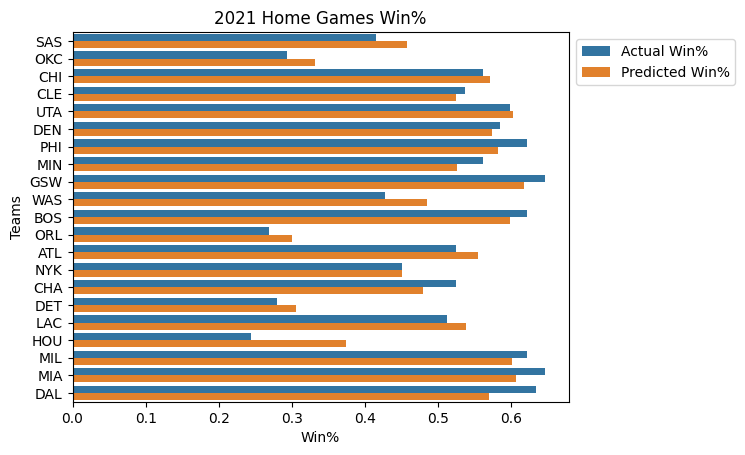

In [ ]:
home_graph_2021 = pd.DataFrame(data={'type': (['W_PCT'] * 21) + (['forest_pred'] * 21), 'vals' : list(home_2021['W_PCT']) + list(home_2021['forest_pred']), 'teams': list(home_2021['TEAM_ID']) + list(home_2021['TEAM_ID'])})
plot = sns.barplot(home_graph_2021, x='vals', y='teams', orient='h', hue = 'type')

handles, labels = plot.get_legend_handles_labels()
plt.legend(handles, ['Actual Win%', 'Predicted Win%'], bbox_to_anchor=(1.35, 1), loc='upper right')
plt.xlabel('Win%')
plt.ylabel('Teams')
plt.title('2021 Home Games Win%')

Text(0.5, 1.0, '2021 Away Games Win%')

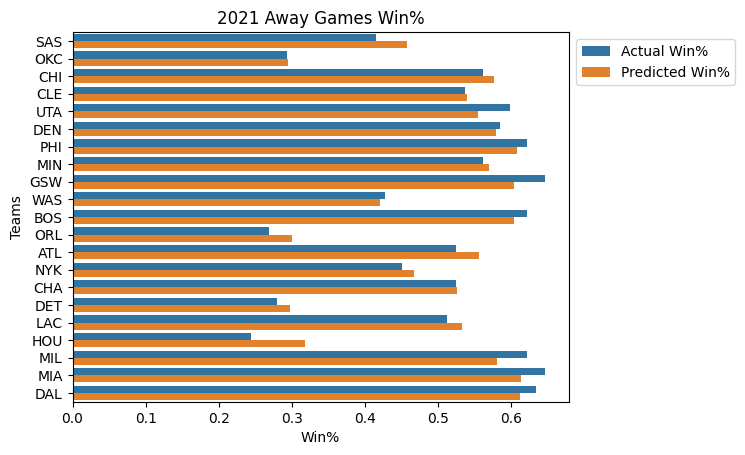

In [ ]:
away_graph_2021 = pd.DataFrame(data={'type': (['W_PCT'] * 21) + (['forest_pred'] * 21), 'vals' : list(away_2021['W_PCT']) + list(away_2021['forest_pred']), 'teams': list(away_2021['TEAM_ID']) + list(away_2021['TEAM_ID'])})
plot = sns.barplot(away_graph_2021, x='vals', y='teams', orient='h', hue = 'type')

handles, labels = plot.get_legend_handles_labels()
plt.legend(handles, ['Actual Win%', 'Predicted Win%'], bbox_to_anchor=(1.35, 1), loc='upper right')
plt.xlabel('Win%')
plt.ylabel('Teams')
plt.title('2021 Away Games Win%')

### Overall

In [ ]:
merged_stats_home_grouped = merged_stats_home.groupby('TEAM_ID').agg('mean')
merged_stats_home_grouped = merged_stats_home_grouped.reset_index()
merged_stats_home_grouped

,TEAM_ID,SEASON_ID,LEAGUE_ID,G,W,L,W_PCT,RETURNTOPLAY,SEASON,HOME_TEAM_ID,PTS_home,FG_PCT_home,AST_home,REB_home,FT_PCT_home,FG3_PCT_home
0,ATL,2010.588235,0.0,82.0,37.764706,44.235294,0.460529,NaN,2011.125000,1.610613e+09,101.660225,0.459520,23.688164,42.245549,0.761978,0.349861
1,BKN,2010.588235,0.0,82.0,36.352941,45.647059,0.443412,NaN,2011.125000,1.610613e+09,99.478230,0.448950,22.587532,42.593300,0.760408,0.344112
2,BOS,2010.500000,0.0,82.0,46.062500,35.937500,0.561813,NaN,2011.066667,1.610613e+09,101.611339,0.461651,23.570369,42.533103,0.773954,0.355250
3,CHA,2011.666667,0.0,82.0,34.733333,47.266667,0.423533,NaN,2011.666667,1.610613e+09,100.597554,0.446497,22.360394,42.696434,0.749762,0.350477
4,CHI,2010.588235,0.0,82.0,40.470588,41.529412,0.493471,NaN,2011.125000,1.610613e+09,99.738484,0.443770,22.936514,45.026333,0.765422,0.357586
5,CLE,2010.588235,0.0,82.0,42.117647,39.882353,0.513706,NaN,2011.125000,1.610613e+09,101.306781,0.456823,22.829471,43.848423,0.746184,0.356600
6,DAL,2010.588235,0.0,82.0,49.058824,32.941176,0.598294,NaN,2011.125000,1.610613e+09,104.302106,0.464123,22.191335,43.329434,0.786288,0.363823
7,DEN,2010.588235,0.0,82.0,44.058824,37.941176,0.537353,NaN,2011.125000,1.610613e+09,108.018572,0.467681,25.301653,44.697905,0.752804,0.350659
8,DET,2010.588235,0.0,82.0,41.411765,40.588235,0.505118,NaN,2011.125000,1.610613e+09,99.432903,0.452007,22.541929,43.422350,0.735493,0.343218
9,GSW,2010.588235,0.0,82.0,46.882353,35.117647,0.571647,NaN,2011.125000,1.610613e+09,109.066700,0.474187,25.737344,44.271463,0.762420,0.373805


In [ ]:
merged_stats_away_grouped = merged_stats_away.groupby('TEAM_ID').agg('mean')
merged_stats_away_grouped = merged_stats_away_grouped.reset_index()
merged_stats_away_grouped

,TEAM_ID,SEASON_ID,LEAGUE_ID,G,W,L,W_PCT,RETURNTOPLAY,SEASON,VISITOR_TEAM_ID,PTS_away,FG_PCT_away,AST_away,REB_away,FT_PCT_away,FG3_PCT_away
0,ATL,2010.588235,0.0,82.0,37.764706,44.235294,0.460529,NaN,2011.125000,1.610613e+09,97.913939,0.445724,21.088482,41.121549,0.755059,0.347511
1,BKN,2010.588235,0.0,82.0,36.352941,45.647059,0.443412,NaN,2011.125000,1.610613e+09,98.199500,0.445138,21.415357,41.066879,0.757158,0.345319
2,BOS,2010.500000,0.0,82.0,46.062500,35.937500,0.561813,NaN,2011.066667,1.610613e+09,100.423218,0.454256,21.780226,41.340088,0.770278,0.351481
3,CHA,2011.666667,0.0,82.0,34.733333,47.266667,0.423533,NaN,2011.666667,1.610613e+09,97.709484,0.437784,21.008309,41.431352,0.748394,0.340905
4,CHI,2010.588235,0.0,82.0,40.470588,41.529412,0.493471,NaN,2011.125000,1.610613e+09,98.075894,0.444411,21.221111,42.879467,0.763038,0.355556
5,CLE,2010.588235,0.0,82.0,42.117647,39.882353,0.513706,NaN,2011.125000,1.610613e+09,98.983385,0.446603,20.015366,42.078498,0.745574,0.347157
6,DAL,2010.588235,0.0,82.0,49.058824,32.941176,0.598294,NaN,2011.125000,1.610613e+09,100.009760,0.449960,21.350682,41.460474,0.783372,0.349827
7,DEN,2010.588235,0.0,82.0,44.058824,37.941176,0.537353,NaN,2011.125000,1.610613e+09,102.686907,0.454887,21.736639,42.778567,0.752802,0.344064
8,DET,2010.588235,0.0,82.0,41.411765,40.588235,0.505118,NaN,2011.125000,1.610613e+09,96.169187,0.439191,20.244153,41.871282,0.728390,0.342697
9,GSW,2010.588235,0.0,82.0,46.882353,35.117647,0.571647,NaN,2011.125000,1.610613e+09,104.941722,0.456701,22.920183,42.446833,0.758398,0.365301


In [ ]:
home_or_away = 'home'
Y = merged_stats_home_grouped['W_PCT']
X = merged_stats_home_grouped[['PTS_' + home_or_away, 'FG_PCT_' +  home_or_away, 'AST_' + home_or_away, 'REB_' + home_or_away, 'FT_PCT_' + home_or_away, 'FG3_PCT_' +  home_or_away]]
OLS_model = sm.OLS(Y, X).fit()
print(OLS_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  W_PCT   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              480.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                    9.03e-24
Time:                        06:29:40   Log-Likelihood:                          49.970
No. Observations:                  30   AIC:                                     -87.94
Df Residuals:                      24   BIC:                                     -79.53
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
home_or_away = 'away'
Y = merged_stats_away_grouped['W_PCT']
X = merged_stats_away_grouped[['PTS_' + home_or_away, 'FG_PCT_' +  home_or_away, 'AST_' + home_or_away, 'REB_' + home_or_away, 'FT_PCT_' + home_or_away, 'FG3_PCT_' +  home_or_away]]
OLS_model = sm.OLS(Y, X).fit()
print(OLS_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  W_PCT   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              301.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                    2.29e-21
Time:                        06:29:43   Log-Likelihood:                          43.037
No. Observations:                  30   AIC:                                     -74.07
Df Residuals:                      24   BIC:                                     -65.67
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
home_or_away = 'home'
train, test = train_test_split(merged_stats_home_grouped, test_size = 0.33, random_state = 2)

X_cols = ['PTS_' + home_or_away, 'FG_PCT_' +  home_or_away, 'AST_' + home_or_away, 'REB_' + home_or_away, 'FT_PCT_' + home_or_away, 'FG3_PCT_' +  home_or_away] # Columns used for prediction
y_col = 'W_PCT'

X = train.loc[:, X_cols]
Y = train.loc[:, y_col]

forest_model = RandomForestRegressor(max_features=2)
forest_model.fit(X, Y)

train["forest_pred"] = forest_model.predict(train.loc[:, X_cols])
test["forest_pred"] = forest_model.predict(test.loc[:, X_cols])

train_rmse = np.mean((train["forest_pred"] - train["W_PCT"]) ** 2) ** 0.5
test_rmse = np.mean((test["forest_pred"] - test["W_PCT"]) ** 2) ** 0.5

train = train.drop(['RETURNTOPLAY', 'LEAGUE_ID', 'SEASON', home_or_away.upper() + '_TEAM_ID'], axis = 1)
train = train.reset_index(drop=True)
display(train)

print("The training RMSE is: " + str(train_rmse) + " and the test RMSE is: " + str(test_rmse) +' and all ' + home_or_away + ' teams.')
merged_stats_home_grouped_train = train

,TEAM_ID,SEASON_ID,G,W,L,W_PCT,PTS_home,FG_PCT_home,AST_home,REB_home,FT_PCT_home,FG3_PCT_home,forest_pred
0,CLE,2010.588235,82.0,42.117647,39.882353,0.513706,101.306781,0.456823,22.829471,43.848423,0.746184,0.356600,0.512429
1,TOR,2010.588235,82.0,41.352941,40.647059,0.504235,103.329767,0.461151,21.913509,41.923127,0.782676,0.360540,0.496457
2,LAC,2010.588235,82.0,40.411765,41.588235,0.492706,102.459855,0.464351,23.729295,42.931339,0.750225,0.343672,0.498158
3,CHI,2010.588235,82.0,40.470588,41.529412,0.493471,99.738484,0.443770,22.936514,45.026333,0.765422,0.357586,0.494572
4,HOU,2010.588235,82.0,47.470588,34.529412,0.578941,103.680479,0.453230,22.124201,43.856394,0.745235,0.352663,0.555126
5,MIL,2010.588235,82.0,38.000000,44.000000,0.463412,101.787220,0.458371,23.202715,42.657858,0.757553,0.363869,0.464464
6,UTA,2010.588235,82.0,43.823529,38.176471,0.534412,101.534360,0.468790,22.427551,43.070323,0.749208,0.358487,0.521045
7,SAC,2010.588235,82.0,34.764706,47.235294,0.423941,104.279002,0.462099,21.695878,42.421207,0.767208,0.359846,0.463387
8,MIN,2010.588235,82.0,33.647059,48.352941,0.410294,101.702969,0.456254,22.890451,43.006529,0.768034,0.344308,0.437628
9,BOS,2010.500000,82.0,46.062500,35.937500,0.561813,101.611339,0.461651,23.570369,42.533103,0.773954,0.355250,0.525413


The training RMSE is: 0.020930840817195012 and the test RMSE is: 0.05548019934492145 and all home teams.


Text(0.5, 1.0, 'Overall Home Games Win%')

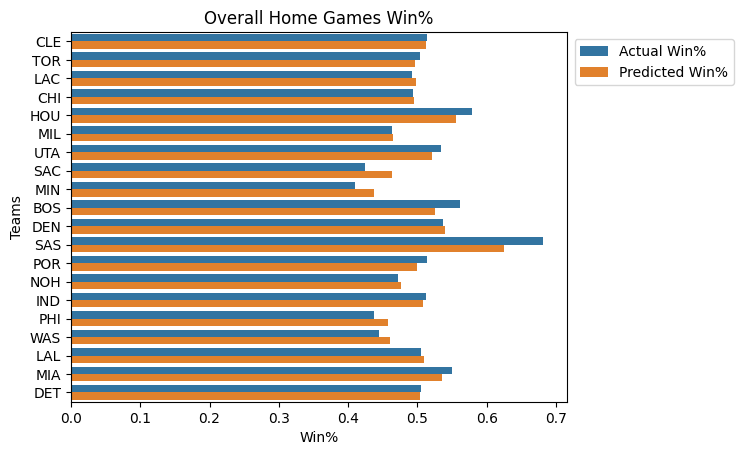

In [ ]:
home_graph = pd.DataFrame(data={'type': (['W_PCT'] * 20) + (['forest_pred'] * 20), 'vals' : list(merged_stats_home_grouped_train['W_PCT']) + list(merged_stats_home_grouped_train['forest_pred']), 'teams': list(merged_stats_home_grouped_train['TEAM_ID']) + list(merged_stats_home_grouped_train['TEAM_ID'])})
plot = sns.barplot(home_graph, x='vals', y='teams', orient='h', hue = 'type')

handles, labels = plot.get_legend_handles_labels()
plt.legend(handles, ['Actual Win%', 'Predicted Win%'], bbox_to_anchor=(1.35, 1), loc='upper right')
plt.xlabel('Win%')
plt.ylabel('Teams')
plt.title('Overall Home Games Win%')

In [ ]:
home_or_away = 'away'
train, test = train_test_split(merged_stats_away_grouped, test_size = 0.33, random_state = 2)

X_cols = ['PTS_' + home_or_away, 'FG_PCT_' +  home_or_away, 'AST_' + home_or_away, 'REB_' + home_or_away, 'FT_PCT_' + home_or_away, 'FG3_PCT_' +  home_or_away] # Columns used for prediction
y_col = 'W_PCT'

X = train.loc[:, X_cols]
Y = train.loc[:, y_col]

forest_model = RandomForestRegressor(max_features=2)
forest_model.fit(X, Y)

train["forest_pred"] = forest_model.predict(train.loc[:, X_cols])
test["forest_pred"] = forest_model.predict(test.loc[:, X_cols])

train_rmse = np.mean((train["forest_pred"] - train["W_PCT"]) ** 2) ** 0.5
test_rmse = np.mean((test["forest_pred"] - test["W_PCT"]) ** 2) ** 0.5

train = train.drop(['RETURNTOPLAY', 'LEAGUE_ID', 'SEASON', 'VISITOR' + '_TEAM_ID'], axis = 1)
train = train.reset_index(drop=True)
display(train)

print("The training RMSE is: " + str(train_rmse) + " and the test RMSE is: " + str(test_rmse) +' and all ' + home_or_away + ' teams.')
merged_stats_away_grouped_train = train

,TEAM_ID,SEASON_ID,G,W,L,W_PCT,PTS_away,FG_PCT_away,AST_away,REB_away,FT_PCT_away,FG3_PCT_away,forest_pred
0,CLE,2010.588235,82.0,42.117647,39.882353,0.513706,98.983385,0.446603,20.015366,42.078498,0.745574,0.347157,0.505497
1,TOR,2010.588235,82.0,41.352941,40.647059,0.504235,100.106364,0.449448,20.733332,40.768561,0.780917,0.354424,0.503815
2,LAC,2010.588235,82.0,40.411765,41.588235,0.492706,100.511542,0.454959,21.183468,41.802381,0.749118,0.354816,0.509202
3,CHI,2010.588235,82.0,40.470588,41.529412,0.493471,98.075894,0.444411,21.221111,42.879467,0.763038,0.355556,0.511436
4,HOU,2010.588235,82.0,47.470588,34.529412,0.578941,101.673631,0.447255,20.845470,42.482224,0.762815,0.354824,0.557731
5,MIL,2010.588235,82.0,38.000000,44.000000,0.463412,98.691039,0.447177,21.351363,41.741653,0.750530,0.344941,0.466331
6,UTA,2010.588235,82.0,43.823529,38.176471,0.534412,98.537597,0.453124,22.528436,41.985522,0.749210,0.337556,0.519775
7,SAC,2010.588235,82.0,34.764706,47.235294,0.423941,100.630789,0.447656,21.781890,41.571936,0.754147,0.354064,0.460637
8,MIN,2010.588235,82.0,33.647059,48.352941,0.410294,100.292149,0.450082,21.526266,41.880380,0.778694,0.344912,0.448952
9,BOS,2010.500000,82.0,46.062500,35.937500,0.561813,100.423218,0.454256,21.780226,41.340088,0.770278,0.351481,0.538156


The training RMSE is: 0.022869709926432637 and the test RMSE is: 0.061002976419812116 and all away teams.


Text(0.5, 1.0, 'Overall Away Games Win%')

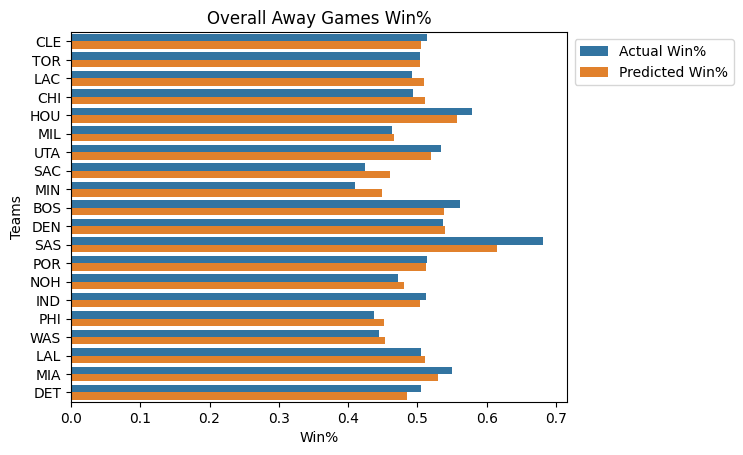

In [ ]:
away_graph = pd.DataFrame(data={'type': (['W_PCT'] * 20) + (['forest_pred'] * 20), 'vals' : list(merged_stats_away_grouped_train['W_PCT']) + list(merged_stats_away_grouped_train['forest_pred']), 'teams': list(merged_stats_away_grouped_train['TEAM_ID']) + list(merged_stats_away_grouped_train['TEAM_ID'])})
plot = sns.barplot(away_graph, x='vals', y='teams', orient='h', hue = 'type')

handles, labels = plot.get_legend_handles_labels()
plt.legend(handles, ['Actual Win%', 'Predicted Win%'], bbox_to_anchor=(1.35, 1), loc='upper right')
plt.xlabel('Win%')
plt.ylabel('Teams')
plt.title('Overall Away Games Win%')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dab229b9-66f6-4eb3-b5aa-92c8de1aae4e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>